In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#display all columns for better visibility
pd.set_option('display.max_columns', None)

In [2]:
# Load the dataset while dropping 'Timestamp' and '@'
data = pd.read_csv("dataset/StudentsData.csv", usecols=lambda column: column not in ['Timestamp', '@'])
print("Data imported successfully")

Data imported successfully


In [3]:
# create a copy of the original dataset
df = data.copy()

In [4]:
# inspect dataframe by printing out the first 5 rows
df.head()

,Age,Gender,Average Household Income,\nEducational qualification of parent/ guardian,Marital status of parents,Residence,Type of Family,No. of siblings,Do your parents/guardians support your academic work?,Average number of days absent from school each month,Distance between home and school,"How often do you use the library, labs, and study spaces",How often do you use the internet to access learning materials,What was your JAMB Score?,How often do you participate in Class?,How often do you experience Stress?,How often do you study on a daily basis?,How often do you engage do you engage in extracurricular activity?,Are you happy studying this course?,Last academic performance,What challenges do you face in preparing for your exams? (Select all that apply),What support do you think could improve your exam performance? (Select all that apply)
0,16 -20,Female,low-middleclass,Post Graduate,Married,Urban,Nuclear,2,NaN,1,less than 1km,5,NaN,195,High,4,5,3,4,4,NaN,Parental Support
1,25-30,Male,upper-middleclass,National Diploma,Single,Rural,Nuclear,4,5.0,5,1-3km,3,2.0,180,Moderate,4,4,3,4,4,NaN,"More access to study materials, Private tutori..."
2,21-25,Male,low,HND,Married,Urban,Nuclear,4,5.0,0,1-3km,3,2.0,171,High,4,4,4,4,4,NaN,"More access to study materials, Private tutorials"
3,25-30,Male,low-middleclass,HND,Single,Rural,Nuclear,6,4.0,1,1-3km,2,3.0,208,High,4,1,1,4,4,NaN,"More access to study materials, Private tutorials"
4,16 -20,Male,low,National Diploma,Married,Urban,Nuclear,3,4.0,0,3-5km,2,2.0,187,Moderate,3,3,4,4,4,NaN,Private tutorials


In [5]:
# check the shape of the dataset i.e. the number of rows and columns
df.shape

(58, 22)

In [6]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 22 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   Age                                                                                     58 non-null     object 
 1   Gender                                                                                  58 non-null     object 
 2   Average Household Income                                                                58 non-null     object 
 3   
Educational qualification of parent/ guardian                                          58 non-null     object 
 4   Marital status of parents                                                               58 non-null     object 
 5   Residence                                                                

In [ ]:
# Check the datatype counts of the dataset
df.dtypes.value_counts()

object     11
int64       9
float64     2
dtype: int64

In [8]:
# number of unique values in each features
df.nunique()

Age                                                                                        6
Gender                                                                                     2
Average Household Income                                                                   4
\nEducational qualification of parent/ guardian                                            6
Marital status of parents                                                                  4
Residence                                                                                  3
Type of Family                                                                             2
No. of siblings                                                                           10
Do your parents/guardians support your academic work?                                      4
Average number of days absent from school each month                                      10
Distance between home and school                                      

In [9]:
# check for duplicated record
df.duplicated().any()

False

In [10]:
# check for missingness in the features
df.isnull().sum()

Age                                                                                        0
Gender                                                                                     0
Average Household Income                                                                   0
\nEducational qualification of parent/ guardian                                            0
Marital status of parents                                                                  0
Residence                                                                                  0
Type of Family                                                                             0
No. of siblings                                                                            0
Do your parents/guardians support your academic work?                                      1
Average number of days absent from school each month                                       0
Distance between home and school                                      

In [11]:
# statistical description
df.describe()

,No. of siblings,Do your parents/guardians support your academic work?,Average number of days absent from school each month,"How often do you use the library, labs, and study spaces",How often do you use the internet to access learning materials,What was your JAMB Score?,How often do you experience Stress?,How often do you study on a daily basis?,How often do you engage do you engage in extracurricular activity?,Are you happy studying this course?,Last academic performance
count,58.000000,57.000000,58.000000,58.000000,57.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.00000
mean,4.500000,4.192982,2.724138,3.137931,3.807018,211.689655,3.862069,3.310345,3.327586,3.965517,4.12069
std,1.769627,1.216532,5.418594,1.276622,1.231123,37.336877,0.963333,1.079423,1.015458,0.935940,0.79643
min,1.000000,1.000000,0.000000,1.000000,1.000000,120.000000,2.000000,1.000000,1.000000,1.000000,1.00000
25%,3.000000,4.000000,0.000000,2.000000,3.000000,195.250000,3.000000,3.000000,3.000000,3.000000,4.00000
50%,4.000000,5.000000,2.000000,3.000000,4.000000,205.000000,4.000000,3.000000,3.000000,4.000000,4.00000
75%,5.000000,5.000000,3.000000,4.000000,5.000000,214.500000,5.000000,4.000000,4.000000,5.000000,5.00000
max,10.000000,5.000000,40.000000,5.000000,5.000000,345.000000,5.000000,5.000000,5.000000,5.000000,5.00000


### Data transformation

In [12]:
# print column names
df.columns

Index(['Age', 'Gender', 'Average Household Income',
       '\nEducational qualification of parent/ guardian',
       'Marital status of parents', 'Residence', 'Type of Family',
       'No. of siblings',
       'Do your parents/guardians support your academic work?',
       'Average number of days absent from school each month',
       'Distance between home and school',
       'How often do you use the library, labs, and study spaces',
       'How often do you use the internet to access learning materials',
       'What was your JAMB Score?', 'How often do you participate in Class?',
       'How often do you experience Stress? ',
       'How often do you study on a daily basis?',
       'How often do you engage do you engage in extracurricular activity?',
       'Are you happy studying this course?', 'Last academic performance',
       'What challenges do you face in preparing for your exams? (Select all that apply)',
       'What support do you think could improve your exam performanc

In [13]:
column_rename_dict = {
    'Average Household Income': 'Household_Income',
    '\nEducational qualification of parent/ guardian': 'Parent_Education',
    'Marital status of parents': 'Parent_Marital_Status',
    'Type of Family': 'Family_Type',
    'No. of siblings': 'Siblings_Quantity',
    'Do your parents/guardians support your academic work?': 'Parental_Support',
    'Average number of days absent from school each month': 'Days_Absent',
    'Distance between home and school': 'Home_School_Dist',
    'How often do you use the library, labs, and study spaces': 'Lib_Lab_Usage',
    'How often do you use the internet to access learning materials': 'Internet_Usage',
    'What was your JAMB Score?': 'JAMB_Score',
    'How often do you participate in Class?': 'Class_Participation',
    'How often do you experience Stress? ': 'Stress',
    'How often do you study on a daily basis?': 'Study_Freq',
    'How often do you engage do you engage in extracurricular activity?': 'Extracurricular',
    'Are you happy studying this course?': 'Happy_Course',
    'Last academic performance': 'Last_Performance',
    'What challenges do you face in preparing for your exams? (Select all that apply)': 'Exam_Challenges',
    'What support do you think could improve your exam performance? (Select all that apply)': 'Support_Needed'
}

df.rename(columns=column_rename_dict, inplace=True)

In [14]:
df.head()

,Age,Gender,Household_Income,Parent_Education,Parent_Marital_Status,Residence,Family_Type,Siblings_Quantity,Parental_Support,Days_Absent,Home_School_Dist,Lib_Lab_Usage,Internet_Usage,JAMB_Score,Class_Participation,Stress,Study_Freq,Extracurricular,Happy_Course,Last_Performance,Exam_Challenges,Support_Needed
0,16 -20,Female,low-middleclass,Post Graduate,Married,Urban,Nuclear,2,NaN,1,less than 1km,5,NaN,195,High,4,5,3,4,4,NaN,Parental Support
1,25-30,Male,upper-middleclass,National Diploma,Single,Rural,Nuclear,4,5.0,5,1-3km,3,2.0,180,Moderate,4,4,3,4,4,NaN,"More access to study materials, Private tutori..."
2,21-25,Male,low,HND,Married,Urban,Nuclear,4,5.0,0,1-3km,3,2.0,171,High,4,4,4,4,4,NaN,"More access to study materials, Private tutorials"
3,25-30,Male,low-middleclass,HND,Single,Rural,Nuclear,6,4.0,1,1-3km,2,3.0,208,High,4,1,1,4,4,NaN,"More access to study materials, Private tutorials"
4,16 -20,Male,low,National Diploma,Married,Urban,Nuclear,3,4.0,0,3-5km,2,2.0,187,Moderate,3,3,4,4,4,NaN,Private tutorials


In [15]:
# check for missingness in the features
df.isnull().sum()

Age                       0
Gender                    0
Household_Income          0
Parent_Education          0
Parent_Marital_Status     0
Residence                 0
Family_Type               0
Siblings_Quantity         0
Parental_Support          1
Days_Absent               0
Home_School_Dist          0
Lib_Lab_Usage             0
Internet_Usage            1
JAMB_Score                0
Class_Participation       0
Stress                    0
Study_Freq                0
Extracurricular           0
Happy_Course              0
Last_Performance          0
Exam_Challenges          12
Support_Needed            1
dtype: int64

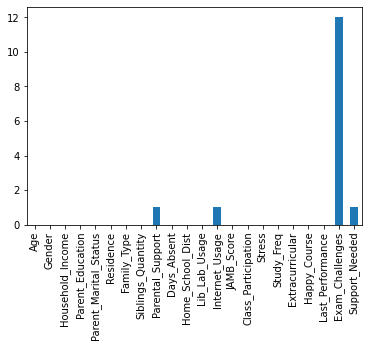

In [16]:
# plot the missingness in the features
df.isnull().sum().plot(kind='bar');

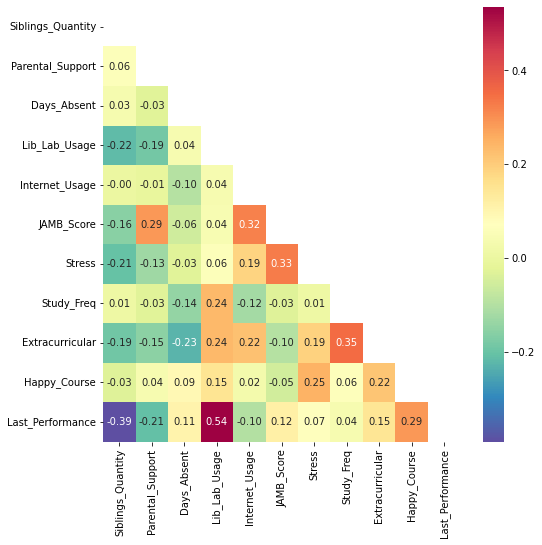

In [17]:
# get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
mask= np.triu(top_corr_features)
plt.figure(figsize=(8,8))
#plot heat map
sns.heatmap(df[top_corr_features].corr(),annot=True, fmt='.2f', mask=mask, cmap='Spectral_r');

## Modelling

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.inspection import permutation_importance

#import regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import pickle

In [19]:
# find categorical variable and encode
cat_features = df.select_dtypes(include=['object', 'category']).columns
num_features = [col for col in df.columns if col not in cat_features]

# print categorical variable
print("Categorical features: ", cat_features)

# print numerical variable
print("Numerical features: ", num_features)

Categorical features:  Index(['Age', 'Gender', 'Household_Income', 'Parent_Education',
       'Parent_Marital_Status', 'Residence', 'Family_Type', 'Home_School_Dist',
       'Class_Participation', 'Exam_Challenges', 'Support_Needed'],
      dtype='object')
Numerical features:  ['Siblings_Quantity', 'Parental_Support', 'Days_Absent', 'Lib_Lab_Usage', 'Internet_Usage', 'JAMB_Score', 'Stress', 'Study_Freq', 'Extracurricular', 'Happy_Course', 'Last_Performance']


In [20]:
# label encoding of categorical features
le = LabelEncoder()
for i in cat_features:
    df[i] = le.fit_transform(df[i])

In [21]:
df.head()

,Age,Gender,Household_Income,Parent_Education,Parent_Marital_Status,Residence,Family_Type,Siblings_Quantity,Parental_Support,Days_Absent,Home_School_Dist,Lib_Lab_Usage,Internet_Usage,JAMB_Score,Class_Participation,Stress,Study_Freq,Extracurricular,Happy_Course,Last_Performance,Exam_Challenges,Support_Needed
0,0,0,2,4,1,2,1,2,NaN,1,3,5,NaN,195,0,4,5,3,4,4,14,8
1,2,1,3,3,2,0,1,4,5.0,5,0,3,2.0,180,2,4,4,3,4,4,14,6
2,1,1,1,1,1,2,1,4,5.0,0,0,3,2.0,171,0,4,4,4,4,4,14,4
3,2,1,2,1,2,0,1,6,4.0,1,0,2,3.0,208,0,4,1,1,4,4,14,4
4,0,1,1,3,1,2,1,3,4.0,0,1,2,2.0,187,2,3,3,4,4,4,14,9


In [22]:
# Fill missing values with the mean for all columns in df
df = df.fillna(df.mean())

In [23]:
df.isnull().sum()

Age                      0
Gender                   0
Household_Income         0
Parent_Education         0
Parent_Marital_Status    0
Residence                0
Family_Type              0
Siblings_Quantity        0
Parental_Support         0
Days_Absent              0
Home_School_Dist         0
Lib_Lab_Usage            0
Internet_Usage           0
JAMB_Score               0
Class_Participation      0
Stress                   0
Study_Freq               0
Extracurricular          0
Happy_Course             0
Last_Performance         0
Exam_Challenges          0
Support_Needed           0
dtype: int64

In [24]:
# create explanatory variable (X) and response variable (y)
X = df.drop('JAMB_Score', axis=1)
y = df['JAMB_Score']

In [25]:
# Split data into train and test sets (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print shapes of train and test sets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (40, 21), y_train shape: (40,)
X_test shape: (18, 21), y_test shape: (18,)


In [26]:
# Scale numeric features excluding 'JAMB_Score'
sc = StandardScaler()
numeric = X_train.columns.difference(['JAMB_Score'])
X_train[numeric], X_test[numeric] = sc.fit_transform(X_train[numeric]), sc.transform(X_test[numeric])

In [27]:
#  assert data split to avoid leakage
print(len(X_train) + len(X_test) == len(X))
print(len(y_train) + len(y_test) == len(y))

True
True


In [28]:
# instantiate models
modelclasses = {'LinearR': LinearRegression(), 
                'SVR': SVR(), 
                'LassoR': Lasso(), 
                'RidgeR': Ridge(),
                'RandomForest': RandomForestRegressor()
                }

In [29]:
# Iteration of models

# create lists to store model results
rmse_scores = []
r2_scores = []
mae_scores = []

for model_name, model_method in modelclasses.items():
       
    # fit model to training data
    model_method.fit(X_train, y_train)
    
    # predict the outcomes on the test set
    y_pred = model_method.predict(X_test)
    
    # append RMSE evaluation metric for the model to the list 
    rmse_scores.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    
    # append R2 score evaluation metric for the model to the list
    r2_scores.append(metrics.r2_score(y_test, y_pred))
    
    # append MAE evaluation metric for the model to the list
    mae_scores.append(metrics.mean_absolute_error(y_test, y_pred))
    
# create a dataframe to store the results
reg_results = pd.DataFrame({
    "Model": modelclasses.keys(), 
    "RMSE Score": rmse_scores, 
    "R2 Score": r2_scores,
    "MAE Score": mae_scores
})

reg_results

,Model,RMSE Score,R2 Score,MAE Score
0,LinearR,44.675282,-1.435651,35.770369
1,SVR,28.871034,-0.017197,19.394490
2,LassoR,35.553584,-0.542578,29.673503
3,RidgeR,41.653276,-1.117282,33.214880
4,RandomForest,28.894456,-0.018848,22.157778


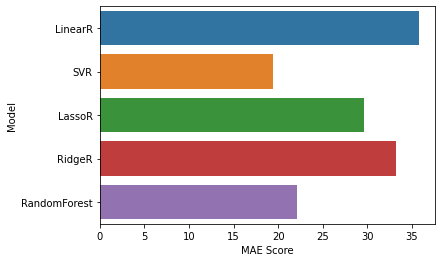

In [30]:
# plot the R2 Score 
sns.barplot(x=reg_results['MAE Score'], y=reg_results.Model);

### Best Model Selection:
**Best Model**: **SVR (Support Vector Regression)**

### Justification:
- **RMSE**: The SVR has the lowest RMSE score (28.87), indicating it has the least error in predicting outcomes compared to the other models.
- **MAE**: It also has the lowest MAE score (19.39), suggesting that, on average, its predictions are closer to the actual values than the other models.
- **R² Score**: While the R² score for SVR is negative, indicating that it is not performing as well as a mean predictor, the other models also show negative R² scores, which suggests that all models have challenges in capturing the variance in the target variable.

In [31]:
# Define the SVR model
svr = SVR()

# Define the parameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5, 1],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']  # 'scale' is the default in newer versions
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, 
                           scoring='neg_mean_absolute_error', 
                           cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Negate to get MAE

print(" Results from Grid Search " )
print("Best Estimator:", grid_search.best_estimator_)
print("Best Parameters:", best_params)
print("Best MAE Score:", best_score)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
 Results from Grid Search 
Best Estimator: SVR(C=0.1, epsilon=0.01, kernel='linear')
Best Parameters: {'C': 0.1, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
Best MAE Score: 24.442852199275265


In [32]:
# Build the SVR model using the best parameters
model = SVR(**best_params)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred = model.predict(X_test)

In [33]:
# Evaluation Metrics
def evaluation_metrics_func(y_test, y_pred):
    
    #print('Evaluation metric results:-')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
    print(f'R2 is : {metrics.r2_score(y_test, y_pred)}',end='\n')
    print(f'MAE is : {metrics.mean_absolute_error(y_test, y_pred)}',end='\n\n')

In [34]:
# computing the evaluation metrics
evaluation_metrics_func(y_test, y_pred)

RMSE is : 28.35573087659158
R2 is : 0.01878952380865062
MAE is : 18.980542289544466



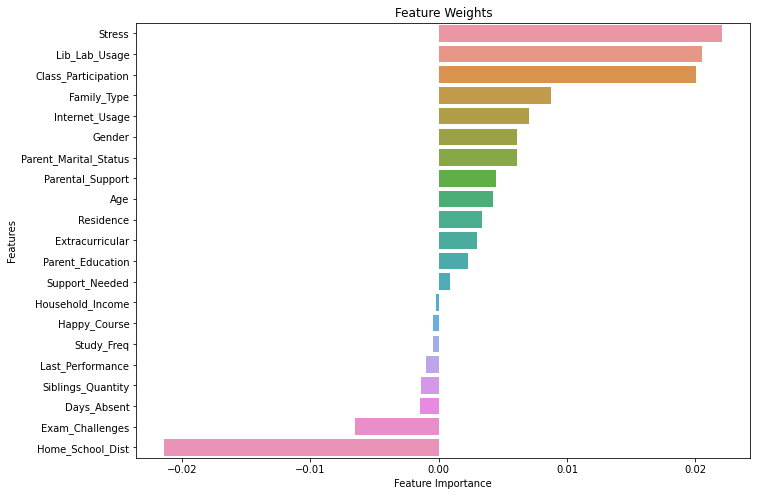

In [35]:
# Fit the SVR model with the best parameters
model.fit(X_train, y_train)

# Calculate permutation feature importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Create a DataFrame of feature importance
feat_imp_ = pd.DataFrame(result.importances_mean, index=X.columns, columns=["Feature Importance"]).sort_values(by="Feature Importance", ascending=False)

# Plot feature weights
plt.figure(figsize=(11, 8))
plt.ylabel('Features')
plt.title('Feature Weights')
sns.barplot(x=feat_imp_['Feature Importance'], y=feat_imp_.index)
plt.show()

In [36]:
# save the model to disk
# filename = 'finalized_model.sav'
# pickle.dump(model, open(filename, 'wb'))